In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def readFromExcelToDataFrame():
    return pd.read_excel('synthetic_data_1.xlsx')

In [3]:
df = readFromExcelToDataFrame()
df.info

<bound method DataFrame.info of          Dates     Values
106 2021-04-17  44.308096
259 2021-09-17  14.283958
45  2021-02-15  41.147219
26  2021-01-27  89.270178
78  2021-03-20  88.952714
346 2021-12-13  61.794119
90  2021-04-01  44.648857
311 2021-11-08  73.727745
239 2021-08-28  19.110246
6   2021-01-07  40.597884
120 2021-05-01  83.253630
141 2021-05-22   4.408898
263 2021-09-21  80.766846
286 2021-10-14  16.338047
299 2021-10-27  30.779705
210 2021-07-30  16.985627
294 2021-10-22  41.032400
101 2021-04-12  13.253341
221 2021-08-10  77.261781
140 2021-05-21  57.643744
142 2021-05-23  42.769387
199 2021-07-19  35.887877
59  2021-03-01  75.516365
293 2021-10-21  21.730607
302 2021-10-30  62.818313
254 2021-09-12  54.873234
68  2021-03-10  14.979368
332 2021-11-29  17.616748
113 2021-04-24  38.549996
191 2021-07-11  88.695678
..         ...        ...
197 2021-07-17  84.828704
243 2021-09-01  41.861041
115 2021-04-26  63.401575
265 2021-09-23  19.305871
72  2021-03-14  47.857211
333 20

(array([737791., 737850., 737911., 737972., 738034., 738095., 738156.]),
 <a list of 7 Text xticklabel objects>)

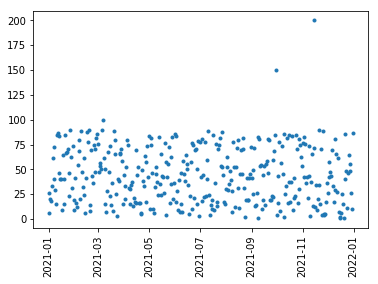

In [4]:
plt.plot(df['Dates'], df['Values'], '.')
plt.xticks(rotation='vertical')